In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [ ]:
def loadData():
    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/31_DM/20_homeWork2/data/adult.data', header=None)
    df.columns = ["age",
                  "workclass",
                  "fnlwgt",
                  "education",
                  "education_num",
                  "marital_status",
                  "occupation",
                  "relationship",
                  "race",
                  "sex",
                  "capital_gain",
                  "capital_loss",
                  "hours_per_week",
                  "native_country",
                  "salary"
                  ]

    # 清除不必要欄位
    # education_num
    df = df.drop(['education_num',
            'native_country'
            ], axis=1)

    # 刪除缺失值的資料
    
    fliter2 = (df["occupation"] != ' ?')
    fliter3 = (df["workclass"] != ' ?')
    df_1 = df[fliter2 & fliter3]

    # salary 注意 ' <=50K' 有空格
    # <=50K 編為0
    # >50K 編為1
    df_1.loc[df_1.loc[:, 'salary'] == ' <=50K', 'salary'] = 0
    df_1.loc[df_1['salary'] == ' >50K', 'salary'] = 1

    # sex
    # Male 編為0
    # Female 編為1
    df_1.loc[df_1['sex'] == ' Male', 'sex'] = 0
    df_1.loc[df_1['sex'] == ' Female', 'sex'] = 1
    df_1[['salary', 'sex']] = df_1[['salary', 'sex']].astype(int)

    data = pd.get_dummies(df_1)
    x = data.drop('hours_per_week', axis=1)
    y = data['hours_per_week'].to_frame()
    return x, y

def loadTestData(trainData):
    df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/31_DM/20_homeWork2/data/adult.test', header=None)
    df_test.columns = ["age",
              "workclass",
              "fnlwgt",
              "education",
              "education_num",
              "marital_status",
              "occupation",
              "relationship",
              "race",
              "sex",
              "capital_gain",
              "capital_loss",
              "hours_per_week",
              "native_country",
              "salary"
                  ]

    # 清除不必要欄位
    # education_num
    df_test=df_test.drop(['education_num',
                'native_country',
                ],axis=1)
    # 判斷有缺失值的欄位 ' ?' 
    fliter_list=[]
    for column in df_test.columns:
      if (df_test[column].value_counts().index==' ?').any():
        fliter_list.append(column)
    # 刪除缺失值的資料
    df_test=df_test[(df_test[fliter_list]!=' ?').all(axis=1)]

    # salary 注意 ' <=50K.' 有空格 and 最後有點
    # <=50K 編為0
    # >50K 編為1

    df_test.loc[df_test.loc[:,'salary']==' <=50K.','salary']=0
    df_test.loc[df_test['salary']==' >50K.','salary']=1

    # sex 
    # Male 編為0
    # Female 編為1

    df_test.loc[df_test['sex']==' Male','sex']=0
    df_test.loc[df_test['sex']==' Female','sex']=1


    df_test[['salary','sex']]=df_test[['salary','sex']].astype(int)
    df_test_data=pd.get_dummies(df_test)
    add_list=list(set(trainData.columns)-set(df_test_data.columns))
    df_test_data[add_list]=0

    x = df_test_data.drop('hours_per_week', axis=1)
    y = df_test_data['hours_per_week'].to_frame()
    return x, y



def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))
    return mape

def _score(y, y_hat):
    y = np.array(y)
    df = pd.DataFrame(
        [[r2_score(y, y_hat),
          mean_absolute_error(y, y_hat),
          mean_squared_error(y, y_hat, squared=False),
          MAPE(y,y_hat)
          ]],
        columns=[
            'r2_score',
            'MAE',
            'RMSE',
            'MAPE'
        ]
    )
    return df

def train_Regressor(estimator_list: list, X_train, Y_train, **kwargs):
    for estimator in estimator_list:
      print(f'{estimator.__class__.__name__}  start')
      estimator.fit(X_train, Y_train)
      print(f'{estimator.__class__.__name__}  end')
    return estimator_list

In [ ]:
X_train, Y_train = loadData()
X_test, Y_test = loadTestData(X_train)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
X_train

,age,fnlwgt,sex,capital_gain,capital_loss,salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,39,77516,0,2174,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,50,83311,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,38,215646,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,53,234721,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,28,338409,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
32557,40,154374,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
32558,58,151910,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
32559,22,201490,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
X_test

,age,fnlwgt,sex,capital_gain,capital_loss,salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,25,226802,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,38,89814,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,28,336951,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,44,160323,0,7688,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
5,34,198693,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,245211,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
16276,39,215419,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
16278,38,374983,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
16279,44,83891,0,5455,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [ ]:
Y_train

,hours_per_week
0,40
1,13
2,40
3,40
4,40
...,...
32556,38
32557,40
32558,40
32559,20


In [ ]:
Y_test

,hours_per_week
0,40
1,50
2,40
3,40
5,30
...,...
16275,40
16276,36
16278,50
16279,40


In [ ]:
def normalization_X_Y(X_train, Y_train, X_test, Y_test, **kwargs):
    from sklearn.preprocessing import MinMaxScaler
    scaler_X = MinMaxScaler()
    scaler_Y = MinMaxScaler()
    X_train_temp = scaler_X.fit_transform(X_train)
    X_test_temp = scaler_X.transform(X_test)
    Y_train_temp = scaler_Y.fit_transform(Y_train)
    Y_test_temp = scaler_Y.transform(Y_test)
    parmer_dict = {"X_train": X_train_temp,
                   "Y_train": Y_train_temp,
                   "X_test": X_test_temp,
                   "Y_test": Y_test_temp,
                   "scaler_X": scaler_X,
                   "scaler_Y": scaler_Y
                   }
    return parmer_dict

# using normalization

In [ ]:
estimator_list = [
    RandomForestRegressor(),
    XGBRegressor(),
    KNeighborsRegressor(),
    SVR(),
]
prmer_dict = normalization_X_Y(X_train, Y_train, X_test, Y_test)

estimator_list = train_Regressor(estimator_list, prmer_dict['X_train'], prmer_dict['Y_train'])

RandomForestRegressor  start


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor  end
XGBRegressor  start
[09:59:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor  end
KNeighborsRegressor  start
KNeighborsRegressor  end
SVR  start


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR  end


In [ ]:
df_feature_importances_=pd.DataFrame(estimator_list[0].feature_importances_,columns=['values'],index=X_train.columns.to_list())
df_feature_importances_=df_feature_importances_.sort_values('values')

In [ ]:
df_feature_importances_

,values
occupation_ Armed-Forces,0.000222
workclass_ Without-pay,0.000507
education_ Preschool,0.000749
marital_status_ Married-AF-spouse,0.000942
relationship_ Wife,0.001339
...,...
capital_gain,0.021075
education_ Some-college,0.021851
sex,0.040303
age,0.266713


In [ ]:
def test_score(estimator_list: list, prmer_dict: dict, **kwargs):
    train_score_list = []
    test_score_list = []
    for estimator in estimator_list:
        Y_train_pred = estimator.predict(prmer_dict["X_train"])
        Y_train_inverse = prmer_dict['scaler_Y'].inverse_transform(Y_train_pred.reshape(-1, 1))
        Y_train = prmer_dict['scaler_Y'].inverse_transform(prmer_dict['Y_train'].reshape(-1, 1))

        Y_test_pred = estimator.predict(prmer_dict['X_test'])
        Y_test_inverse = prmer_dict['scaler_Y'].inverse_transform(Y_test_pred.reshape(-1, 1))
        Y_test = prmer_dict['scaler_Y'].inverse_transform(prmer_dict['Y_test'].reshape(-1, 1))

        df_train_score = _score(Y_train, Y_train_inverse)
        df_train_score.index = [estimator.__class__.__name__]
        df_test_score = _score(Y_test, Y_test_inverse)
        df_test_score.index = [estimator.__class__.__name__]
        train_score_list.append(df_train_score)
        test_score_list.append(df_test_score)
    return pd.concat(train_score_list), pd.concat(test_score_list)
df_train_score, df_test_score = test_score(estimator_list, prmer_dict)

In [ ]:
df_train_score

,r2_score,MAE,RMSE,MAPE
RandomForestRegressor,0.886102,2.763591,4.044856,0.098077
XGBRegressor,0.277389,6.908756,10.188191,0.253285
KNeighborsRegressor,0.420664,6.342587,9.122421,0.227178
SVR,0.331854,7.358718,9.796716,0.254495


In [ ]:
df_test_score

,r2_score,MAE,RMSE,MAPE
RandomForestRegressor,0.193125,7.467772,10.835220,0.271151
XGBRegressor,0.260166,7.013928,10.375324,0.262556
KNeighborsRegressor,0.125862,7.822187,11.277803,0.288411
SVR,0.170229,8.028186,10.987877,0.288936


# KNN 不同的K值

In [ ]:
def knn_to_K(K:int,prmer_dict: dict):
  test_score_list = []
  for k in range(5,K):
    print(f"-----{k} start------")
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(prmer_dict["X_train"],prmer_dict["Y_train"])

    Y_test_pred = knn.predict(prmer_dict['X_test'])
    Y_test_inverse = prmer_dict['scaler_Y'].inverse_transform(Y_test_pred.reshape(-1, 1))
    Y_test = prmer_dict['scaler_Y'].inverse_transform(prmer_dict['Y_test'].reshape(-1, 1))
    df_test_score = _score(Y_test, Y_test_inverse)
    df_test_score.index = [f'knn_{k}']
    test_score_list.append(df_test_score)
    print(f"-----{k} end  ------")
  return pd.concat(test_score_list)

df_knn=knn_to_K(30,prmer_dict)
df_knn

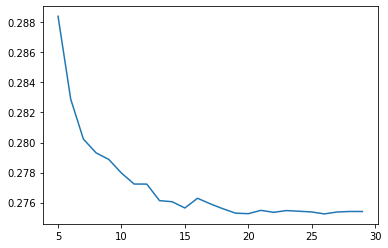

In [20]:
df_knn.index=range(5,30)
plt.plot(df_knn['MAPE'])

In [29]:
df_knn

,r2_score,MAE,RMSE,MAPE
5,0.125862,7.822187,11.277803,0.288411
6,0.156161,7.664849,11.080628,0.282887
7,0.172551,7.560179,10.972488,0.280227
8,0.183702,7.507566,10.898303,0.279312
9,0.188261,7.476396,10.867830,0.278873
10,0.195614,7.420255,10.818498,0.277968
11,0.199097,7.387077,10.795045,0.277236
12,0.201718,7.370307,10.777370,0.277231
13,0.206014,7.340260,10.748327,0.276131
14,0.208576,7.326109,10.730974,0.276057


In [31]:
df_knn.sort_values('MAPE')

,r2_score,MAE,RMSE,MAPE
26,0.220428,7.216336,10.650323,0.275245
20,0.217648,7.239775,10.669295,0.275261
19,0.217796,7.247676,10.668286,0.275296
22,0.218283,7.234129,10.664966,0.275351
27,0.220422,7.211422,10.650362,0.275372
25,0.219841,7.221007,10.654328,0.275376
29,0.221232,7.204706,10.644831,0.275405
28,0.220379,7.212255,10.650657,0.275408
24,0.218973,7.224176,10.660258,0.275424
23,0.218492,7.229556,10.663536,0.275468


In [28]:
print(f"{df_knn['MAPE'].idxmin()} {df_knn['MAPE'][df_knn['MAPE'].idxmin()]}")

26 0.27524531974061495
